### Calculation of Pearson correlation coefficients

#### Import libraries  

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Parameters  

In [11]:
csv_in = '../ai-0102/pandas_training-utf8.csv'

#### Read CSV file

In [12]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=13, header=0)
print(df.shape)
print(df.info())
display(df.head())

(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CHANNEL    440 non-null    object
 1   REGION     440 non-null    object
 2   FRESH      440 non-null    int64 
 3   MILK       440 non-null    int64 
 4   GROCERY    440 non-null    int64 
 5   FROZEN     440 non-null    int64 
 6   DET_PAPER  440 non-null    int64 
 7   DELICA     440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB
None


,CHANNEL,REGION,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


##### Select only numerical columns (from FRESH to DELICA)  

In [13]:
df_num = df.loc[:, 'FRESH':]

### Correlation coefficients (all by all)  
総当たりで相関係数を計算  

In [14]:
df_corr = df_num.corr(); display(df_corr)
print('MILK vs GROCERY:', df_corr.at['MILK','GROCERY'])

,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
FRESH,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
MILK,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
GROCERY,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
FROZEN,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
DET_PAPER,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
DELICA,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


MILK vs GROCERY: 0.7283351181536442


#### Spearman

In [15]:
df_corr_sp = df_num.corr(method='spearman'); display(df_corr_sp)
print('MILK vs GROCERY (Spearman):', df_corr_sp.at['MILK','GROCERY'])

,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
FRESH,1.000000,-0.083921,-0.119983,0.384395,-0.198333,0.238400
MILK,-0.083921,1.000000,0.773049,-0.092971,0.679979,0.372771
GROCERY,-0.119983,0.773049,1.000000,-0.168831,0.801282,0.304256
FROZEN,0.384395,-0.092971,-0.168831,1.000000,-0.207183,0.233024
DET_PAPER,-0.198333,0.679979,0.801282,-0.207183,1.000000,0.183314
DELICA,0.238400,0.372771,0.304256,0.233024,0.183314,1.000000


MILK vs GROCERY (Spearman): 0.7730485114172712


### Correlation coefficients (Dataframe vs Series)  
1列対他列の相関係数を計算  

In [16]:
ser_milk_corr = df.corrwith(df['MILK']); print(ser_milk_corr)
print('MILK vs GROCERY:', ser_milk_corr['GROCERY'])

FRESH        0.100510
MILK         1.000000
GROCERY      0.728335
FROZEN       0.123994
DET_PAPER    0.661816
DELICA       0.406368
dtype: float64
MILK vs GROCERY: 0.728335118153645


#### Correlation coefficients (Series vs Series)  
1列対1列の相関係数を計算  

In [17]:
corr_milk_grocery = df['MILK'].corr(df['GROCERY'])
print('MILK vs GROCERY:', corr_milk_grocery)

MILK vs GROCERY: 0.728335118153645


#### Heatmap using seaborn  

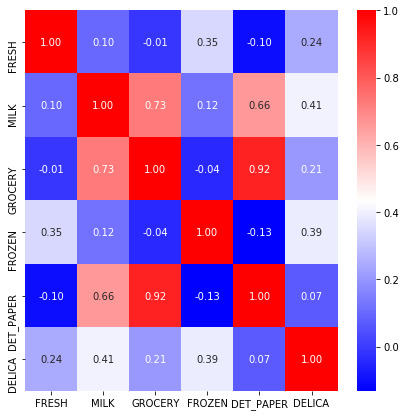

In [18]:
plt.figure(figsize=(7,7))
sns.heatmap(df_corr,annot=True,fmt='.2f',cmap='bwr')
plt.show()